In [1]:

import numpy as np
from sklearn.cluster import AffinityPropagation

# Create sample data
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Fit the model
af = AffinityPropagation().fit(X)

# Get cluster centers
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

# Print results
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)
print('Cluster centers: %s' % cluster_centers_indices)
print('Labels: %s' % labels)

Estimated number of clusters: 2
Cluster centers: [0 3]
Labels: [0 0 0 1 1 1]


Silhouette Coefficient: 0.287
Calinski-harbazs: 3.375
Silhouette Coefficient: 0.889


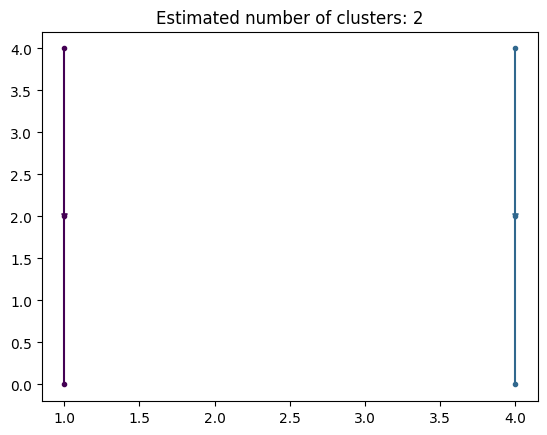

In [4]:
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt
af = AffinityPropagation(preference=-50,damping=0.9, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(
    "Silhouette Coefficient: %0.3f"
    % silhouette_score(X, labels)
)
print(
    "Calinski-harbazs: %0.3f"
    % calinski_harabasz_score(X, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % davies_bouldin_score(X, labels)
)
colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="v"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()